<a href="https://colab.research.google.com/github/minnji88/DeepLearning2020/blob/master/6_2%20%EC%88%9C%ED%99%98_%EC%8B%A0%EA%B2%BD%EB%A7%9D_%EC%9D%B4%ED%95%B4%ED%95%98%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 케라스의 순환 층
넘파이로 간단하게 구현한 과정이 실제 케라스의 SimpleRNN 층에 해당합니다

In [1]:
from keras.layers import SimpleRNN

SimpleRNN이 한 가지 다른 점은 넘파이 예제처럼 하나의 시퀀스가 아니라 다른 케라스 층과 마찬가지로 시퀀스 배치를 처리한다는 것입니다. 즉, (timesteps, input_features) 크기가 아니라 (batch_size, timesteps, input_features) 크기의 입력을 받습니다.

케라스에 있는 모든 순환 층과 동일하게 SimpleRNN은 두 가지 모드로 실행할 수 있습니다. 각 타임스텝의 출력을 모은 전체 시퀀스를 반환하거나(크기가 (batch_size, timesteps, output_features)인 3D 텐서), 입력 시퀀스에 대한 마지막 출력만 반환할 수 있습니다(크기가 (batch_size, output_features)인 2D 텐서). 이 모드는 객체를 생성할 때 return_sequences 매개변수로 선택할 수 있습니다. 

In [3]:
# 코드 6-22 IMDB 데이터 전처리하기

from keras.datasets import imdb
from keras.preprocessing import sequence

max_features = 10000  # 특성으로 사용할 단어의 수
maxlen = 500  # 사용할 텍스트의 길이(가장 빈번한 max_features 개의 단어만 사용합니다)
batch_size = 32

print('데이터 로딩...')
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)
print(len(input_train), '훈련 시퀀스')
print(len(input_test), '테스트 시퀀스')

print('시퀀스 패딩 (samples x time)')
input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)
print('input_train 크기:', input_train.shape)
print('input_test 크기:', input_test.shape)

데이터 로딩...
17465344/17464789 [==============================] - 0s 0us/step


<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

25000 훈련 시퀀스
25000 테스트 시퀀스
시퀀스 패딩 (samples x time)
input_train 크기: (25000, 500)
input_test 크기: (25000, 500)


In [4]:
# 코드 6-23 Embedding 층과 SimpleRNN 층을 사용한 모델 훈련하기

from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN

from keras.layers import Dense

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 32)                2080      
_________________________________________________________________
dense (Dense)                (None, 1)                 33        
Total params: 322,113
Trainable params: 322,113
Non-trainable params: 0
_________________________________________________________________


In [6]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 20s 124ms/step - loss: 0.6677 - acc: 0.5709 - val_loss: 0.4839 - val_acc: 0.7790
Epoch 2/10
157/157 [==============================] - 19s 121ms/step - loss: 0.3955 - acc: 0.8384 - val_loss: 0.3506 - val_acc: 0.8542
Epoch 3/10
157/157 [==============================] - 19s 121ms/step - loss: 0.2736 - acc: 0.8940 - val_loss: 0.3877 - val_acc: 0.8310
Epoch 4/10
157/157 [==============================] - 19s 121ms/step - loss: 0.2053 - acc: 0.9233 - val_loss: 0.3960 - val_acc: 0.8248
Epoch 5/10
157/157 [==============================] - 19s 122ms/step - loss: 0.1342 - acc: 0.9551 - val_loss: 0.4064 - val_acc: 0.8436
Epoch 6/10
157/157 [==============================] - 19s 121ms/step - loss: 0.0848 - acc: 0.9728 - val_loss: 0.6478 - val_acc: 0.7440
Epoch 7/10
157/157 [==============================] - 19s 119ms/step - loss: 0.0540 - acc: 0.9844 - val_loss: 0.5743 - val_acc: 0.7946
Epoch 8/10
157/157 [==============================] - 1

훈련과 검증의 손실 그리고 정확도 그래프를 그려봅시다.

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

3번째부터 과대적합이 시작되고, 83%에서 정확도가 머무는 것을 확인할 수 있습니다. 3장에서 이미 87~88%를 도달했는데 아직 이 모델의 성능은 거기에 미치지 못했습니다.

이런 원인은 전체 시퀀스가 아니라 처음 500개의 단어만 입력에 사용했기 때문입니다. 이 RNN은 기준 모델보다 얻은 정보가 적습니다. 또 다른 원인은 SimpleRNN이 텍스트 시퀀스에 적합하지 않습니다. 이제 더 잘 작동하는 다른 순환 층을 살펴봅시다.



## LSTM과 GRU 층 이해하기

케라스에는 SimpleRNN 외에 다른 순환 층도 있습니다. LSTM과 GRU 2개입니다. 실전에서는 항상 둘 중 하나를 사용합니다. SimpleRNN은 실전에 쓰기에는 너무 단순하기 때문입니다.

SimpleRNN은 이론적으로 시간 t에서 이전의 모든 타임스텝의 정보를 유지할 수 있습니다. 실제로는 긴 시간에 걸친 의존성은 학습할 수 없는 것이 문제입니다. 층이 많은 일반 네트워크에서 나타나는 것과 비슷한 현상인 그래디언트 소실 문제(vanishing gradient problem) 때문입니다.

이런 문제를 해결하기 위해 고안된 것이 LSTM과 GRU 층입니다. 그 중 LSTM을 살펴봅시다. LSTM은 Long Short-Term Memory의 약자입니다. 이 알고리즘은 위의 문제를 해결하기 위해 만들어졌습니다. 우선 이 층은 SimpleRNN의 변종입니다. 정보를 여러 타임스텝에 걸쳐 나르는 방법이 추가됩니다.

![LSTM](https://upload.wikimedia.org/wikipedia/commons/thumb/3/3b/The_LSTM_cell.png/1200px-The_LSTM_cell.png)

- c_t와 f_t의 곱셈은 이동을 위한 데이터 흐름에서 관련이 적은 정보를 의도적으로 삭제
- i_t와 k_t는 현재에 대한 정보를 제공하고 이동 트랙을 새로운 정보로 업데이트

## 6.2.3 케라스를 사용한 LSTM 예제

In [7]:
from keras.layers import LSTM

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 44s 272ms/step - loss: 0.6119 - acc: 0.6662 - val_loss: 0.3664 - val_acc: 0.8562
Epoch 2/10
157/157 [==============================] - 48s 307ms/step - loss: 0.3116 - acc: 0.8776 - val_loss: 0.3662 - val_acc: 0.8494
Epoch 3/10
157/157 [==============================] - 48s 303ms/step - loss: 0.2462 - acc: 0.9069 - val_loss: 0.3095 - val_acc: 0.8722
Epoch 4/10
157/157 [==============================] - 48s 306ms/step - loss: 0.2018 - acc: 0.9267 - val_loss: 0.2977 - val_acc: 0.8864
Epoch 5/10
157/157 [==============================] - 53s 338ms/step - loss: 0.1702 - acc: 0.9398 - val_loss: 0.2952 - val_acc: 0.8864
Epoch 6/10
157/157 [==============================] - 48s 306ms/step - loss: 0.1530 - acc: 0.9465 - val_loss: 0.3281 - val_acc: 0.8716
Epoch 7/10
157/157 [==============================] - 48s 306ms/step - loss: 0.1401 - acc: 0.9518 - val_loss: 0.3961 - val_acc: 0.8602
Epoch 8/10
157/157 [==============================] - 4

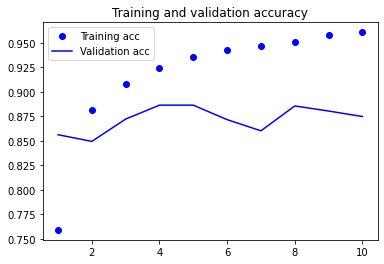

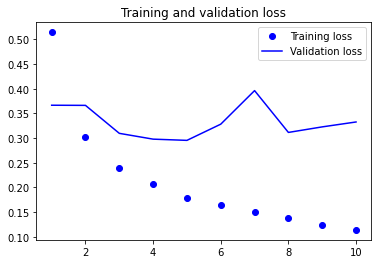

In [9]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

이번에는 96%정도의 정확도를 달성했습니다. SimpleRNN보다는 확실히 좋은 것을 알 수 있습니다. 
